# Figure 45. Features contribution analysis in pathogenic synonymous mutation prediction.

1. DNA. All DNA selected feature under 111bp.
2. RNA. All RNA selected feature under 141bp.
3. Protein. All protein selected feature under 17aa.
4. RNA structural. Selected from RNA structural feature under 141bp.
5. Protein structural. Selected from protein structural feature under 17aa.

## 1 AUC



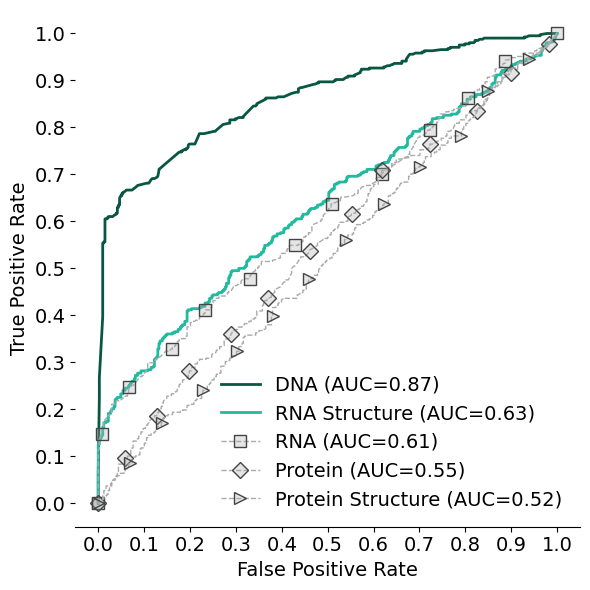

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Load data
dna = pd.read_csv("../../DNA_features/result/reproduce_test816_DNAfea_111bp_predicted.csv", usecols=['label', 'DNA'])
rna = pd.read_csv("../../RNA_features/result_seq_structure/reproduce_test816_141bp_predicted.csv", usecols=['label', 'RNA'])
rna_structure = pd.read_csv("../../RNA_features/result_structure/reproduce_test816_141bp_predicted.csv", usecols=['label', 'RNA_structural'])
protein = pd.read_csv("../../Protein_features/result/reproduce_test816_17aa_predicted.csv", usecols=['label', 'protein'])
protein_structure = pd.read_csv("../../Protein_features/result_structure/reproduce_test816_17aa_predicted.csv", usecols=['label', 'protein_structural'])

# Rename
rna_structure = rna_structure.rename(columns={'RNA_structural': 'RNA Structure'})
protein_structure = protein_structure.rename(columns={'protein_structural': 'Protein Structure'})

# Prepare data
datasets = [
    ('DNA', dna, 'DNA'),
    ('RNA', rna, 'RNA'),
    ('RNA Structure', rna_structure, 'RNA Structure'),
    ('Protein', protein, 'protein'),
    ('Protein Structure', protein_structure, 'Protein Structure')
]

# Calculdate AUC & AUPR
auc_scores = {}
aupr_scores = {}
roc_data = {}
pr_data = {}
for name, df, col in datasets:
    y_true = df['label'].astype(int)
    y_score = df[col].astype(float)
    # ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc
    roc_data[name] = (fpr, tpr)
    # PR curve
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    aupr = average_precision_score(y_true, y_score)
    aupr_scores[name] = aupr
    pr_data[name] = (recall, precision)

# Best and suboptimal feature
sorted_auc = sorted(auc_scores.items(), key=lambda x: x[1], reverse=True)
best_feature = sorted_auc[0][0]  
second_best_feature = sorted_auc[1][0] if len(sorted_auc) > 1 else None

# Set color and linestyle
colors = {name: '#AAA' for name in auc_scores}
colors[best_feature] = '#085742'  
if second_best_feature:
    colors[second_best_feature] = '#21ba9f'  
linestyles = {name: '-' if name in [best_feature, second_best_feature] else '--' for name in pr_data}
markers = ['o', 's', '^', 'D', '>']  
marker_map = {name: markers[i % len(markers)] if name not in [best_feature, second_best_feature] else None 
              for i, name in enumerate(pr_data)}

# Plot ROC Curve
plt.figure(figsize=(6, 6))
for m, _ in sorted_auc:
    fpr, tpr = roc_data[m]
    marker = marker_map[m]
    if marker:
        plt.plot(fpr, tpr, 
                color=colors[m], 
                linestyle=linestyles[m],
                marker=marker, 
                markevery=0.1, 
                markersize=8,
                markerfacecolor=to_rgba(colors[m], alpha=0.3),
                markeredgecolor='#444',
                label=f'{m} (AUC={auc_scores[m]:.2f})',
                linewidth=1)
    else:
        plt.plot(fpr, tpr,
                color=colors[m],
                linestyle=linestyles[m],
                label=f'{m} (AUC={auc_scores[m]:.2f})',
                linewidth=2)

# Set legend
plt.legend(loc='lower right',  ncol=1, frameon=False, fontsize=14)

# Set labels and ticks
plt.xlabel('False Positive Rate', fontsize=14, fontfamily='DejaVu Sans')
plt.ylabel('True Positive Rate', fontsize=14, fontfamily='DejaVu Sans')
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=14, fontfamily='DejaVu Sans')
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=14, fontfamily='DejaVu Sans')

# Remove boundary
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', left=True)

# Save figure
plt.tight_layout()
plt.savefig('./Figure4A.png', bbox_inches='tight')
plt.show()

## 2 AUPR

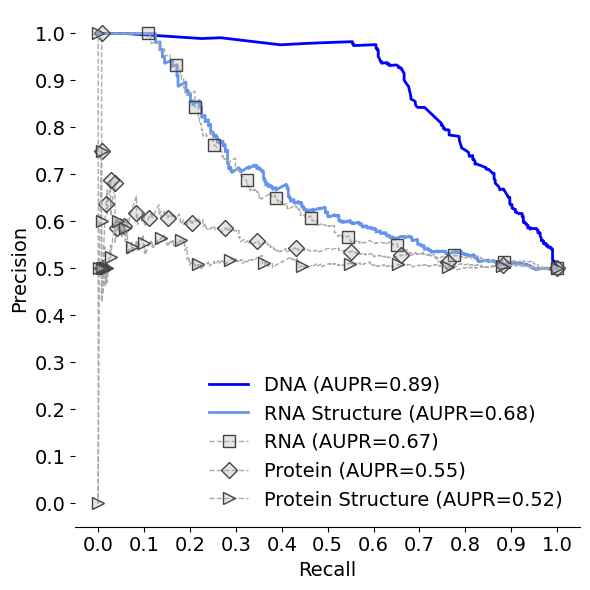

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Best and suboptimal feature
sorted_aupr = sorted(aupr_scores.items(), key=lambda x: x[1], reverse=True)
best_feature = sorted_aupr[0][0]
second_best_feature = sorted_aupr[1][0] if len(sorted_aupr) > 1 else None

# Set color and linestyle
linestyles = {name: '-' if name in [best_feature, second_best_feature] else '--' for name in pr_data}
markers = ['o', 's', '^', 'D', '>'] 
marker_map = {name: markers[i % len(markers)] if name not in [best_feature, second_best_feature] else None 
              for i, name in enumerate(pr_data)}

# Set color and linestyle
colors = {name: '#AAA' for name in aupr_scores}
colors[best_feature] = '#0000ff'  
if second_best_feature:
    colors[second_best_feature] = '#6495ed'  
linestyles = {name: '-' if name in [best_feature, second_best_feature] else '--' for name in pr_data}
markers = ['o', 's', '^', 'D', '>']  
marker_map = {name: markers[i % len(markers)] if name not in [best_feature, second_best_feature] else None 
              for i, name in enumerate(pr_data)}

# Plot PR Curve
plt.figure(figsize=(6, 6))
for m, _ in sorted_aupr:
    recall, precision = pr_data[m]
    marker = marker_map[m]
    if marker:
        plt.plot(recall, precision,
                color=colors[m], 
                linestyle=linestyles[m],
                marker=marker, 
                markevery=0.1, 
                markersize=8,
                markerfacecolor=to_rgba(colors[m], alpha=0.3),
                markeredgecolor='#444',
                label=f'{m} (AUPR={aupr_scores[m]:.2f})',
                linewidth=1)
    else:
        plt.plot(recall, precision,
                color=colors[m],
                linestyle=linestyles[m],
                label=f'{m} (AUPR={aupr_scores[m]:.2f})',
                linewidth=2)

# Set legend
plt.legend(loc='lower right',  ncol=1, frameon=False, fontsize=14)

# Set labels and ticks
plt.xlabel('Recall', fontsize=14, fontfamily='DejaVu Sans')
plt.ylabel('Precision', fontsize=14, fontfamily='DejaVu Sans')
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=14, fontfamily='DejaVu Sans')
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=14, fontfamily='DejaVu Sans')

# Remove boundary
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', left=True)

# Save figure
plt.tight_layout()
plt.savefig('./Figure4B.png', bbox_inches='tight')
plt.show()